# Frequency of Baby Names US


## Check out data and paths 

In [19]:
import pandas as pd
import numpy as np
        

In [20]:
# Checkout one particular year / file
path1880 = '../datasets/babynames/yob1880.txt'

In [21]:
names1880 = pd.read_csv(path1880, names=['names','sex','births'])
names1880

,names,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [44]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

## Concanate all files into a DataFrame

In [45]:
# Combine all years (files) in one dataframe
years = range(1880, 2011) #excludes 2011
blobs = []
columns = ['names','sex','births']

for year in years:
    path = '../datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    blobs.append(frame)

In [24]:
#print('LAST FRAME:' '\n', frame)
#print('ALL BLOBS:' '\n', blobs)

In [25]:
names = pd.concat(blobs, ignore_index = True)

In [26]:
names


,names,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


## Explore the data

In [43]:
# Whats the total birth rate per year
# total_births = names.pivot_table('births', rows='year', cols='sex', aggfunc=sum)
#
total_births = names.pivot_table(values=['births','sex', 'names'], index=['year'], columns='sex', aggfunc=sum)
total_births[:10]

#mean_ratings = pd.pivot_table(data, values=['rating'], index=['title'], columns='gender', aggfunc={'rating': np.mean}

births         prop     
sex        F       M    F    M
year                          
1880   90993  110493  1.0  1.0
1881   91955  100748  1.0  1.0
1882  107851  113687  1.0  1.0
1883  112322  104632  1.0  1.0
1884  129021  114445  1.0  1.0
1885  133056  107802  1.0  1.0
1886  144538  110785  1.0  1.0
1887  145983  101412  1.0  1.0
1888  178631  120857  1.0  1.0
1889  178369  110590  1.0  1.0

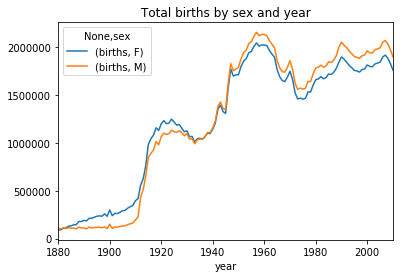

In [28]:
# Plot may work only the second time, probs with jupyther server?
total_births.plot(title='Total births by sex and year')

## Extending the data using 'group operations'

In [29]:
# Insert column 'prop' with fraction of babies. e.g. prop == 0.02 means 2 out of 100 have that name/
def add_prop(group):
    #Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

# Then add this column to the dataset
names = names.groupby(['year', 'sex']).apply(add_prop)


In [30]:
# Sanity check
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [31]:
names


,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [32]:
# Get the top 1000 names for each sex/year combination
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

In [33]:
top1000

names sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

## Analyzing naming trends

In [36]:
# Split the top1000 into boys / girls
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [37]:
# checking
total_births

births         
sex         F        M
year                  
1880    90993   110493
1881    91955   100748
1882   107851   113687
1883   112322   104632
1884   129021   114445
...       ...      ...
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382

[131 rows x 2 columns]

In [39]:
#Create a subset dataframe with names of interest
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

KeyError: "['John' 'Harry' 'Mary' 'Marilyn'] not in index"